In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [24]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from sklearn import model_selection

In [25]:
import tensorflow

In [26]:
df_cat = pd.read_csv(r"C:\Users\Odh05\Desktop\Ai_training\cats.csv")
df_cat.head()

,Unnamed: 0,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


In [27]:
x = df_cat['Bwt']
y=df_cat['Hwt']

In [28]:
#split data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25,random_state=0)

In [42]:
y_train.size

108

In [29]:
#define model architecture 3 layers
model_cat  = Sequential()
model_cat.add(Dense(4, activation='relu',input_dim=1))#input layer
model_cat.add(Dense(6, activation='relu'))#hidden layer
model_cat.add(Dense(1, activation='linear'))#output layer

In [30]:
model_cat.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [36]:
#compile the model
model_cat.compile(loss='mse', optimizer='RMSProp', metrics=['mse'])

In [57]:
#train the model
model_diag = model_cat.fit(x_train,y_train,batch_size=10,epochs=150,verbose=0)

In [58]:
#predict
pred = [5.0, 7.0]
new = model_cat.predict(pred)
print(new)

[[20.063507]
 [28.344706]]


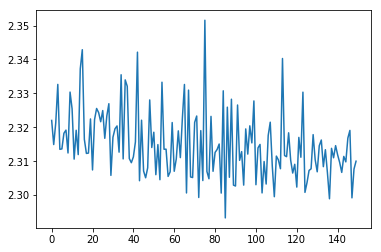

In [59]:
#plotmodel_eting
model_epoc_values = model_diag.history['loss']
plt.plot(model_epoc_values)
plt.show()

In [56]:
model_diag.history.keys()

dict_keys(['loss', 'mean_squared_error'])

In [60]:
#validate the model
def fn_difference(act, pred):
    error = act-pred
    abs_erorr = abs(error)
    percent_error = (error)/act
    
    mean_abs_error = np.mean(abs_error)
    mean_abs_percentage_error = np.mean(percent_error)
    
    return mean_abs_percentage_error

In [86]:
#model perfromance
predicted_y_train = model_cat.predict(x_train)
# predicted_y_train

In [99]:
act = y_train.loc[1:]
# act.reshape()
error_diff = predicted_y_train-y_train.reshape(-1,1)
# print(error_diff)
# diff
# train_error = fn_difference(act,predicted_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
